## Working with images

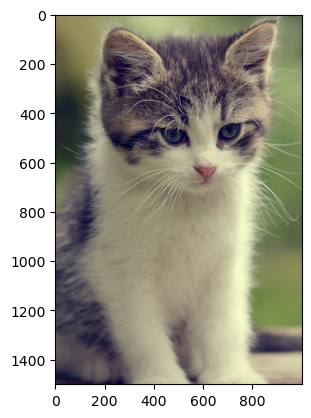

In [35]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = Image.open("cat.jpg")
img = img.convert('RGB')

# zoom in on the cat.
crop_box = (400, 200, 1400, 1700)  # x1, y1, x2, y2
cropped_img = img.crop(crop_box)
#cropped_img.show()  # <--- this pops out a window showing the cat.  Use matplotlib to embed the image.
plt.imshow(cropped_img)

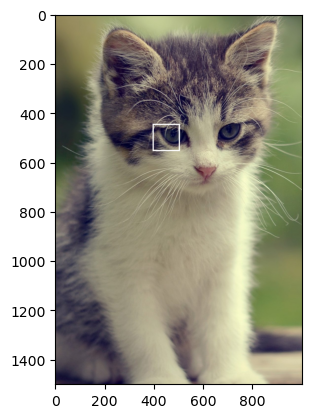

In [36]:
# drop crop rectangle, but move it outward by five pixels in each
# dimension to allow room for the drawn border.
crop_eye = (400-5, 450-5, 500+5, 550+5) # in cropped image's coordinate system
draw = ImageDraw.Draw(cropped_img)
draw.rectangle(crop_eye, outline="white", width=5)  # Draw a white rectangle out

plt.imshow(cropped_img)
plt.show()

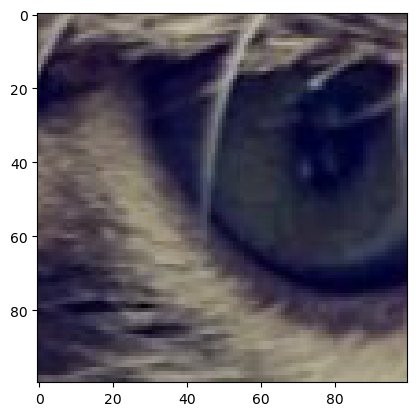

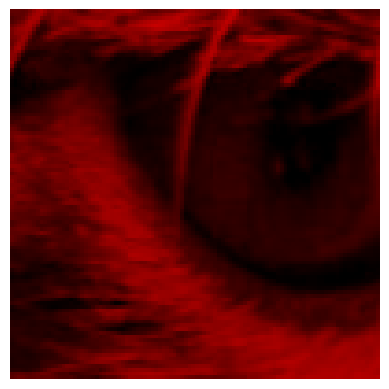

In [29]:
crop_eye = (400, 450, 500, 550)  # in cropped image's coordinate system
eye_img = cropped_img.crop(crop_eye)
plt.imshow(eye_img)
plt.show()

# Extract the red channel
red_channel = eye_img.getchannel('R')

# Convert the channel to a numpy array
red_array = np.array(red_channel)

zero_channel = Image.new('L', eye_img.size)
red_image = Image.merge('RGB', (red_channel, zero_channel, zero_channel))
plt.imshow(red_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [30]:
# Print the upper-left corner of the array
crop_corner = (0, 0, 8, 8)
corner_img = eye_img.crop(crop_corner)
red_corner = corner_img.getchannel('R')
red_corner_array = np.array(red_corner)
print(red_corner_array)


[[ 95  96  96  94 100 118 143 162]
 [ 88  93  93  95 107 131 155 166]
 [ 76  85  91 101 123 151 165 163]
 [ 80  90 103 118 144 167 161 142]
 [101 114 128 140 158 166 138 100]
 [120 135 147 153 161 155 110  60]
 [117 137 142 144 152 128  76  44]
 [114 121 134 153 146  99  59  54]]


In [31]:
print_matrix(red_corner_array)

<IPython.core.display.Math object>